In [18]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('~/registrar-recommender/00_data/2013-2020/top5.csv')
data1 = df[df['Major 1']=='Economics (BS)']
data2 = data1.groupby('Descr').filter(lambda x : len(x)>200)
data = data2.dropna(subset=['Class Year']) 

In [ ]:
df['Major 1'].value_counts()

In [19]:
df = pd.read_csv('~/registrar-recommender/00_data/2013-2020/top5.csv')
data1 = df[df['Major 1']=='Biomedical Engineering (BSE)']
data2 = data1.groupby('Descr').filter(lambda x : len(x)>200)
data = data2.dropna(subset=['Class Year']) 

/Users/josephlee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
# set Class Year Number as students' class year
data['Class Year Number'] = 0
data.loc[data['Class Year'] == 'First Year Fall Term', 'Class Year Number'] = 1
data.loc[data['Class Year'] == 'First Year Spring Term', 'Class Year Number'] = 2
data.loc[data['Class Year'] == 'Second Year Fall Term', 'Class Year Number'] = 3
data.loc[data['Class Year'] == 'Second Year Spring Term', 'Class Year Number'] = 4
data.loc[data['Class Year'] == 'Third Year Fall Term', 'Class Year Number'] = 5
data.loc[data['Class Year'] == 'Third Year Spring Term', 'Class Year Number'] = 6
data.loc[data['Class Year'] == 'Fourth Year Fall Term', 'Class Year Number'] = 7
data.loc[data['Class Year'] == 'Fourth Year Spring Term', 'Class Year Number'] = 8

/Users/josephlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/josephlee/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
data = data.rename(columns={"Calculation ID": "ID"})
# save class years separately 
data_1 = data[data['Class Year Number'] == 1]
data_2 = data[data['Class Year Number'] == 2]
data_3 = data[data['Class Year Number'] == 3]
data_4 = data[data['Class Year Number'] == 4]
data_5 = data[data['Class Year Number'] == 5]
data_6 = data[data['Class Year Number'] == 6]
data_7 = data[data['Class Year Number'] == 7]
data_8 = data[data['Class Year Number'] == 8]



In [22]:
# create sparse matrix by each student
ohe1_ = pd.get_dummies(data_1.Descr).groupby(data_1.ID).sum().reset_index()
ohe2_ = pd.get_dummies(data_2.Descr).groupby(data_2.ID).sum().reset_index()
ohe3_ = pd.get_dummies(data_3.Descr).groupby(data_3.ID).sum().reset_index()
ohe4_ = pd.get_dummies(data_4.Descr).groupby(data_4.ID).sum().reset_index()
ohe5_ = pd.get_dummies(data_5.Descr).groupby(data_5.ID).sum().reset_index()
ohe6_ = pd.get_dummies(data_6.Descr).groupby(data_6.ID).sum().reset_index()
ohe7_ = pd.get_dummies(data_7.Descr).groupby(data_7.ID).sum().reset_index()
ohe8_ = pd.get_dummies(data_8.Descr).groupby(data_8.ID).sum().reset_index()
set1 = set(ohe1_['ID'].values)
set2 = set(ohe2_['ID'].values)
set3 = set(ohe3_['ID'].values)
set4 = set(ohe4_['ID'].values)
set5 = set(ohe5_['ID'].values)
set6 = set(ohe6_['ID'].values)
set7 = set(ohe7_['ID'].values)
set8 = set(ohe8_['ID'].values)
set_difference1 = set1-set2
set_difference2 = set2-set1





In [23]:
# get all courses name from each year
row_t1 = data_1['Descr'].value_counts().index
row_t2 = data_2['Descr'].value_counts().index
row_t3 = data_3['Descr'].value_counts().index
row_t4 = data_4['Descr'].value_counts().index
row_t5 = data_5['Descr'].value_counts().index
row_t6 = data_6['Descr'].value_counts().index
row_t7 = data_7['Descr'].value_counts().index
row_t8 = data_8['Descr'].value_counts().index

# sem1 to sem2

In [24]:
ohe1_f = ohe1_[~ohe1_['ID'].isin(set_difference1)]

ohe2_f = ohe2_[~ohe2_['ID'].isin(set_difference2)]
# ohe3_f = ohe3_[~ohe3_['ID'].isin(set_difference4)]
ohe1t_1 = ohe1_f.set_index(ohe1_f.columns[0])
ohe2t_1 = ohe2_f.set_index(ohe2_f.columns[0])

In [25]:
transt1_2 = ohe1t_1.T.dot(ohe2t_1)
transt1_2_sub = transt1_2.loc[row_t1]
transt1_2m = transt1_2_sub[row_t2]
row_sum = transt1_2m.sum(axis=1).to_frame()
transt1_2mc = transt1_2m.div(transt1_2m.sum(axis=1), axis=0)

In [26]:
transt1_2mc_r = transt1_2mc.reset_index()
transt1_2mc_m = pd.melt(transt1_2mc_r, 
            id_vars='index', 
            value_vars=list(transt1_2mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans1_2 = transt1_2mc_m[transt1_2mc_m['prob']>0.1]

In [ ]:
ego = set(trans1_2['index'].value_counts().index)
alter = set(trans1_2['post_class'].value_counts().index)
class_list1_2=list(ego.union(alter))
df_class = pd.DataFrame(class_list1_2,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr1_2_econ = df_class.reset_index()
df_attr1_2_econ.to_csv('semester1to2_bse_attr.csv')

In [ ]:
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans1_2["index"] = trans1_2["index"].map(class_map) 
trans1_2["post_class"] = trans1_2["post_class"].map(class_map) 
trans1_2.to_csv('semester1to2_bse_node.csv')

# sem2 to sem3

In [ ]:
#semester 2 to semester 3 
set_difference2_3 = set2-set3
set_difference3_2 = set3-set2
ohe23_f = ohe2_[~ohe2_['ID'].isin(set_difference2_3)]
ohe32_f = ohe3_[~ohe3_['ID'].isin(set_difference3_2)]
ohe2t_1f = ohe23_f.set_index(ohe23_f.columns[0])
ohe3t_1f = ohe32_f.set_index(ohe32_f.columns[0])
transt2_3 = ohe2t_1f.T.dot(ohe3t_1f)

In [ ]:
transt2_3_sub = transt2_3.loc[row_t2]
transt2_3m = transt2_3_sub[row_t3]
transt2_3mc = transt2_3m.div(transt2_3m.sum(axis=1), axis=0)
transt2_3mc_r = transt2_3mc.reset_index()
transt2_3mc_m = pd.melt(transt2_3mc_r, 
            id_vars='index', 
            value_vars=list(transt2_3mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans2_3 = transt2_3mc_m[transt2_3mc_m['prob']>0.1]

In [ ]:
ego = set(trans2_3['index'].value_counts().index)
alter = set(trans2_3['post_class'].value_counts().index)
class_list2_3=list(ego.union(alter))
df_class = pd.DataFrame(class_list2_3,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr2_3_econ = df_class.reset_index()
df_attr2_3_econ.to_csv('semester2to3_econ_attr.csv')


In [ ]:
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans2_3["index"] = trans2_3["index"].map(class_map) 
trans2_3["post_class"] = trans2_3["post_class"].map(class_map) 
trans2_3.to_csv('semester2to3_econ_node.csv')


# sem3 to sem4

In [ ]:
#semester 3 to semester 4
set_difference3_4 = set3-set4
set_difference4_3 = set4-set3
ohe34_f = ohe3_[~ohe3_['ID'].isin(set_difference3_4)]
ohe43_f = ohe4_[~ohe4_['ID'].isin(set_difference4_3)]
ohe3t_1f = ohe34_f.set_index(ohe34_f.columns[0])
ohe4t_1f = ohe43_f.set_index(ohe43_f.columns[0])
transt3_4 = ohe3t_1f.T.dot(ohe4t_1f)

In [ ]:
transt3_4_sub = transt3_4.loc[row_t3]
transt3_4m = transt3_4_sub[row_t4]
transt3_4mc = transt3_4m.div(transt3_4m.sum(axis=1), axis=0)
transt3_4mc_r = transt3_4mc.reset_index()
transt3_4mc_m = pd.melt(transt3_4mc_r, 
            id_vars='index', 
            value_vars=list(transt3_4mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans3_4 = transt3_4mc_m[transt3_4mc_m['prob']>0.1]

In [ ]:
ego = set(trans3_4['index'].value_counts().index)
alter = set(trans3_4['post_class'].value_counts().index)
class_list3_4=list(ego.union(alter))
df_class = pd.DataFrame(class_list3_4,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr3_4_econ = df_class.reset_index()
df_attr3_4_econ.to_csv('semester3to4_econ_attr.csv')
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans3_4["index"] = trans3_4["index"].map(class_map) 
trans3_4["post_class"] = trans3_4["post_class"].map(class_map) 
trans3_4.to_csv('semester3to4_econ_node.csv')

In [14]:
#semester 3 to semester 4
set_difference4_5 = set4-set5
set_difference5_4 = set5-set4
ohe45_f = ohe4_[~ohe4_['ID'].isin(set_difference4_5)]
ohe54_f = ohe5_[~ohe5_['ID'].isin(set_difference5_4)]
ohe4t_1f = ohe45_f.set_index(ohe45_f.columns[0])
ohe5t_1f = ohe54_f.set_index(ohe54_f.columns[0])
transt4_5 = ohe4t_1f.T.dot(ohe5t_1f)

In [15]:
transt4_5_sub = transt4_5.loc[row_t4]
transt4_5m = transt4_5_sub[row_t5]
transt4_5mc = transt4_5m.div(transt4_5m.sum(axis=1), axis=0)
transt4_5mc_r = transt4_5mc.reset_index()
transt4_5mc_m = pd.melt(transt4_5mc_r, 
            id_vars='index', 
            value_vars=list(transt4_5mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans4_5 = transt4_5mc_m[transt4_5mc_m['prob']>0.1]

In [ ]:
ego = set(trans4_5['index'].value_counts().index)
alter = set(trans4_5['post_class'].value_counts().index)
class_list4_5=list(ego.union(alter))
df_class = pd.DataFrame(class_list4_5,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr4_5_econ = df_class.reset_index()
df_attr4_5_econ.to_csv('semester4to5_econ_attr.csv')
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans4_5["index"] = trans4_5["index"].map(class_map) 
trans4_5["post_class"] = trans4_5["post_class"].map(class_map) 
trans4_5.to_csv('semester4to5_econ_node.csv')


In [ ]:
#semester 3 to semester 4
set_difference5_6 = set5-set6
set_difference6_5 = set6-set5
ohe56_f = ohe5_[~ohe5_['ID'].isin(set_difference5_6)]
ohe65_f = ohe6_[~ohe6_['ID'].isin(set_difference6_5)]
ohe5t_1f = ohe56_f.set_index(ohe56_f.columns[0])
ohe6t_1f = ohe65_f.set_index(ohe65_f.columns[0])
transt5_6 = ohe5t_1f.T.dot(ohe6t_1f)

In [ ]:
transt5_6_sub = transt5_6.loc[row_t5]
transt5_6m = transt5_6_sub[row_t6]
transt5_6mc = transt5_6m.div(transt5_6m.sum(axis=1), axis=0)
transt5_6mc_r = transt5_6mc.reset_index()
transt5_6mc_m = pd.melt(transt5_6mc_r, 
            id_vars='index', 
            value_vars=list(transt5_6mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans5_6 = transt5_6mc_m[transt5_6mc_m['prob']>0.1]

In [ ]:
ego = set(trans5_6['index'].value_counts().index)
alter = set(trans5_6['post_class'].value_counts().index)
class_list5_6=list(ego.union(alter))
df_class = pd.DataFrame(class_list5_6,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr5_6_econ = df_class.reset_index()
df_attr5_6_econ.to_csv('semester5to6_econ_attr.csv')
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans5_6["index"] = trans5_6["index"].map(class_map) 
trans5_6["post_class"] = trans5_6["post_class"].map(class_map) 
trans5_6.to_csv('semester5to6_econ_node.csv')

In [ ]:
#semester 3 to semester 4
set_difference6_7 = set6-set7
set_difference7_6 = set7-set6
ohe67_f = ohe6_[~ohe6_['ID'].isin(set_difference6_7)]
ohe76_f = ohe7_[~ohe7_['ID'].isin(set_difference7_6)]
ohe6t_1f = ohe67_f.set_index(ohe67_f.columns[0])
ohe7t_1f = ohe76_f.set_index(ohe76_f.columns[0])
transt6_7 = ohe6t_1f.T.dot(ohe7t_1f)

In [ ]:
transt6_7_sub = transt6_7.loc[row_t6]
transt6_7m = transt6_7_sub[row_t7]
transt6_7mc = transt6_7m.div(transt6_7m.sum(axis=1), axis=0)
transt6_7mc_r = transt6_7mc.reset_index()
transt6_7mc_m = pd.melt(transt6_7mc_r, 
            id_vars='index', 
            value_vars=list(transt6_7mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans6_7 = transt6_7mc_m[transt6_7mc_m['prob']>0.1]

In [ ]:
ego = set(trans6_7['index'].value_counts().index)
alter = set(trans6_7['post_class'].value_counts().index)
class_list6_7=list(ego.union(alter))
df_class = pd.DataFrame(class_list6_7,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr6_7_econ = df_class.reset_index()
df_attr6_7_econ.to_csv('semester6to7_econ_attr.csv')
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans6_7["index"] = trans6_7["index"].map(class_map) 
trans6_7["post_class"] = trans6_7["post_class"].map(class_map) 
trans6_7.to_csv('semester6to7_econ_node.csv')

In [ ]:
#semester 3 to semester 4
set_difference7_8 = set7-set8
set_difference8_7 = set8-set7
ohe78_f = ohe7_[~ohe7_['ID'].isin(set_difference7_8)]
ohe87_f = ohe8_[~ohe8_['ID'].isin(set_difference8_7)]
ohe7t_1f = ohe78_f.set_index(ohe78_f.columns[0])
ohe8t_1f = ohe87_f.set_index(ohe87_f.columns[0])
transt7_8 = ohe7t_1f.T.dot(ohe8t_1f)

In [ ]:
transt7_8_sub = transt7_8.loc[row_t7]
transt7_8m = transt7_8_sub[row_t8]
transt7_8mc = transt7_8m.div(transt7_8m.sum(axis=1), axis=0)
transt7_8mc_r = transt7_8mc.reset_index()
transt7_8mc_m = pd.melt(transt7_8mc_r, 
            id_vars='index', 
            value_vars=list(transt7_8mc_r.columns[1:]), # list of days of the week
            var_name='post_class', 
            value_name='prob')
trans7_8 = transt7_8mc_m[transt7_8mc_m['prob']>0.1]

In [ ]:
ego = set(trans7_8['index'].value_counts().index)
alter = set(trans7_8['post_class'].value_counts().index)
class_list7_8=list(ego.union(alter))
df_class = pd.DataFrame(class_list7_8,columns=['class_name'])
df_class.index = np.arange(1, len(df_class) + 1)
df_attr7_8_econ = df_class.reset_index()
df_attr7_8_econ.to_csv('semester7to8_econ_attr.csv')
class_map = pd.Series(df_class.index.values,index=df_class.class_name).to_dict()
trans7_8["index"] = trans7_8["index"].map(class_map) 
trans7_8["post_class"] = trans7_8["post_class"].map(class_map) 
trans7_8.to_csv('semester7to8_econ_node.csv')

In [29]:
import matplotlib.pyplot as plt

import networkx as nx
G=nx.from_pandas_edgelist(trans4_5, 'index', 'post_class', ['prob'],create_using=nx.DiGraph())

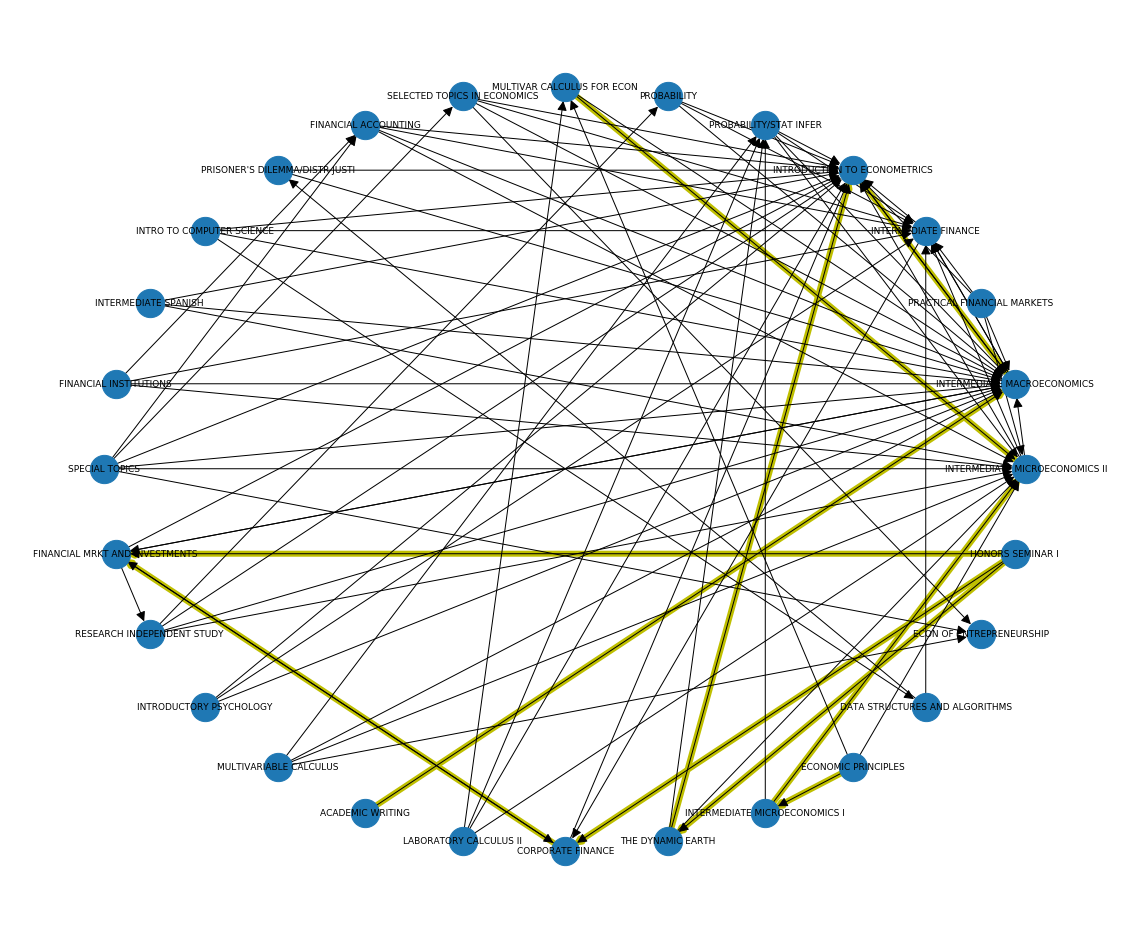

In [30]:
plt.figure(figsize=(20, 17))
pos = nx.shell_layout(G) 
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["prob"] > 0.3]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["prob"] <= 0.3]

nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=0.01, alpha=0.5, style="dashed"
)
nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color="y", width=6)

nx.draw(G, pos, with_labels=True, edge_attr=True,node_size=800, arrowsize=20,font_size = 9)